In [88]:
import numpy as np
import random
class Maze:
    @property
    def Width(self):
        pass
    @Width.setter
    def Width(self,Width):
        self.__Width = Width
    @Width.getter
    def Width(self):
        return self.__Width
    
    @property
    def Height(self):
        pass
    @Height.setter
    def Height(self,Height):
        self.__Height = Height
    @Height.getter
    def Height(self):
        return self.__Height
    
class MazeCreater_Dig(Maze):
    
    #初期化
    def __init__(self,width,height):
        if width < 5 or height < 5:
            pass
        
        #初期値調整
        if width % 2 == 0:
            width+=1
        if height % 2 == 0:
            height+=1
            
        #初期値セット
        self.Height = height
        self.Width  = width
        self.__Maze = np.ones((width,height))
        self.__StartCells = []
        self.Path = 0
        self.Wall = 1
        self.Direction = {"Up":0,"Right":1,"Down":2,"Left":3}
        
    #デバッグ用
    def Debug(self):
        print("Height")
        print(self.Height)
        print("Width")
        print(self.Width)
        print("Maze")
        #output = [["■" for y in range(self.Height)] for x in range(self.Width)]
        """
        for y in range(self.Height):
            output=[]
            for x in range(self.Width):
                if self.__Maze[x,y] == 0:
                    output.append("□")
                else:
                    output.append("■")
            print(output)
        """
        for y in range(self.Height):
            output = ""
            for x in range(self.Width):
                if self.__Maze[x,y]==0:
                    output += " "
                else:
                    output += "■"
            print(output)
        #print(output)
        print("StartCells")
        for Cell in self.__StartCells:
            print("("+str(Cell.X)+")"+"("+str(Cell.Y)+")")
        print("---------")
    
    #迷路作成
    def CreateMaze(self):
        #外周を道にして、それ以外を壁にする。
        for y in range(self.Height):
            for x in range(self.Width):
                if (x==0 or y==0 or x == self.Width-1 or y == self.Height-1):
                    self.__Maze[x,y] = self.Path
                else:
                    self.__Maze[x,y] = self.Wall
        
        #道を作る。
        self.Dig(1,1)
        
        #外周を壁にする
        for y in range(self.Height):
            for x in range(self.Width):
                if (x==0 or y==0 or x == self.Width-1 or y == self.Height-1):
                    self.__Maze[x,y] = self.Wall
                    
        #スタート地点とゴール地点を設定する
        self.__Maze[1,0] = self.Path
        self.__Maze[self.Width-2,self.Height-1] = self.Path
        return self.__Maze
    
    #穴掘り
    def Dig(self,x,y):
        while True:
            #self.Debug()
            directions = []
            #進める方向を配列directionsに格納する
            self.MakeDirections(x,y,directions)
            #進める方向がないならループを終了する
            if len(directions) == 0:
                break
            #現在地を道にセットする
            self.SetPath(x,y)
            #進める方向から1方向を取り出す
            dirIndex = random.randrange(len(directions))
            #取り出した方向へ2マス分道を作る
            if directions[dirIndex] == self.Direction["Up"]:
                path_y = y-1
                self.SetPath(x,path_y)
                path_y -= 1 
                self.SetPath(x,path_y)
            elif directions[dirIndex] == self.Direction["Right"]:
                path_x =x+1
                self.SetPath(path_x,y)
                path_x +=1
                self.SetPath(path_x,y)
            elif directions[dirIndex] == self.Direction["Down"]:
                path_y = y+1
                self.SetPath(x,path_y)
                path_y += 1 
                self.SetPath(x,path_y)
            else:
                path_x = x-1
                self.SetPath(path_x,y)
                path_x -=1
                self.SetPath(path_x,y)
            #掘り進めることができる場所を探索する
            cell = self.GetStartCell()
            #掘り進めることができる場所があるならそこから再帰的に処理を開始する
            if cell != "NULL":
                self.Dig(cell.X,cell.Y)
    #進むことのできる方向を取り出す
    def MakeDirections(self,x,y,directions):
        if(self.__Maze[x,y-1]==self.Wall and self.__Maze[x,y-2]==self.Wall):
            directions.append(self.Direction["Up"])
        if(self.__Maze[x+1,y]==self.Wall and self.__Maze[x+2,y]==self.Wall):
            directions.append(self.Direction["Right"])
        if(self.__Maze[x,y+1]==self.Wall and self.__Maze[x,y+2]==self.Wall):
            directions.append(self.Direction["Down"])
        if(self.__Maze[x-1,y]==self.Wall and self.__Maze[x-2,y]==self.Wall):
            directions.append(self.Direction["Left"])
           
    #道を作る
    def SetPath(self,x,y):
        #現在地を道にする
        self.__Maze[x,y] =  self.Path
        
        if x%2==1 and y%2==1:
            cell =Cell()
            cell.X = x
            cell.Y = y
            self.__StartCells.append(cell)
    
    #新しい道を探す
    def GetStartCell(self):
        if len(self.__StartCells)==0:
            return "NULL"
        while len(self.__StartCells)!=0:
            index = random.randrange(len(self.__StartCells))
            cell = self.__StartCells[index]
            self.__StartCells.pop(index)
            directions = []
            self.MakeDirections(cell.X,cell.Y,directions)
            if len(directions) !=0:
                return cell
        return "NULL"
    def GetMaze(self):
        return self.__Maze

In [7]:
class Cell:
    @property
    def X(self):
        pass
    
    @X.setter
    def X(self,x):
        self.__x = x

    @X.getter
    def X(self):
        return self.__x
    
    @property
    def Y(self):
        pass
    
    @Y.setter
    def Y(self,y):
        self.__y = y
    
    @Y.getter
    def Y(self):
        return self.__y

In [8]:
import numpy as np

In [161]:
height = 120
width = 60
creator = MazeCreater_Dig(height,width)
maze = creator.CreateMaze()
#creator.Debug()

In [135]:
n=0
while True:
    print(n)
    n+=1
    break

0


In [152]:
cell = Cell()
cell.X = 1
cell.Y = 2
lst = [cell]
print(len(lst))

1


In [139]:
creator.Debug()

Height
11
Width
21
Maze
■ ■■■■■■■■■■■■■■■■■■■
■     ■       ■     ■
■ ■■■■■ ■■■■■■■ ■■■ ■
■         ■ ■     ■ ■
■ ■ ■■■■■■■ ■ ■■■■■ ■
■ ■       ■       ■ ■
■ ■■■■■■■■■ ■■■■■ ■ ■
■     ■ ■       ■ ■ ■
■ ■■■■■ ■ ■■■■■■■ ■■■
■               ■   ■
■■■■■■■■■■■■■■■■■■■ ■
StartCells
---------


In [162]:
Maze = creator.GetMaze()
x = width
y = height

In [107]:
import matplotlib.pyplot as plt
import numpy as np
def img_show(img:np.ndarray,cmap = 'gray',vmin=0,vmax=255,interpolation='none')->None:
    img = np.clip(img,vmin,vmax).astype(np.uint8)
         
    plt.imshow(img,cmap = cmap,vmin=vmin,vmax=vmax,interpolation=interpolation)
    #画像を表示
    plt.show()
    plt.close()

In [163]:
Maze = Maze.T

In [164]:
for j in range(y+1):
    for i in range(x+1):
        Maze[i][j]=1-Maze[i][j]

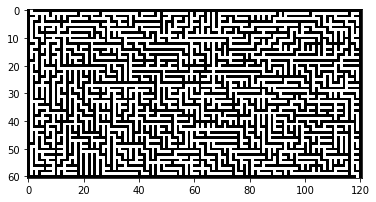

In [165]:
img_show(255*Maze)

In [110]:
x,y = np.mgrid[:100,:100]
x_0,y_0 = (50,60)
x_size,y_size = (10,20)

rect = ((2*abs(x-x_0)<x_size) & (2*abs(y-y_0)<y_size)).astype(np.uint8)
img_show(rect*255)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
